In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df= pd.read_csv('ElectionData.csv')

In [3]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
TimeElapsed                 21643 non-null int64
time                        21643 non-null object
territoryName               21643 non-null object
totalMandates               21643 non-null int64
availableMandates           21643 non-null int64
numParishes                 21643 non-null int64
numParishesApproved         21643 non-null int64
blankVotes                  21643 non-null int64
blankVotesPercentage        21643 non-null float64
nullVotes                   21643 non-null int64
nullVotesPercentage         21643 non-null float64
votersPercentage            21643 non-null float64
subscribedVoters            21643 non-null int64
totalVoters                 21643 non-null int64
pre.blankVotes              21643 non-null int64
pre.blankVotesPercentage    21643 non-null float64
pre.nullVotes               21643 non-null int64
pre.nullVotesPercentage     21643 non-null float

territoryName column

In [5]:
df['territoryName'].unique()

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['territoryName'] = le.fit_transform(df['territoryName'])

Party column

In [7]:
df['Party'].unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Party'] = le.fit_transform(df['Party'])

droppingtime column

In [9]:
df = df.drop(['time'], axis = 1)

There are many columns which are highly correlated and should be handled

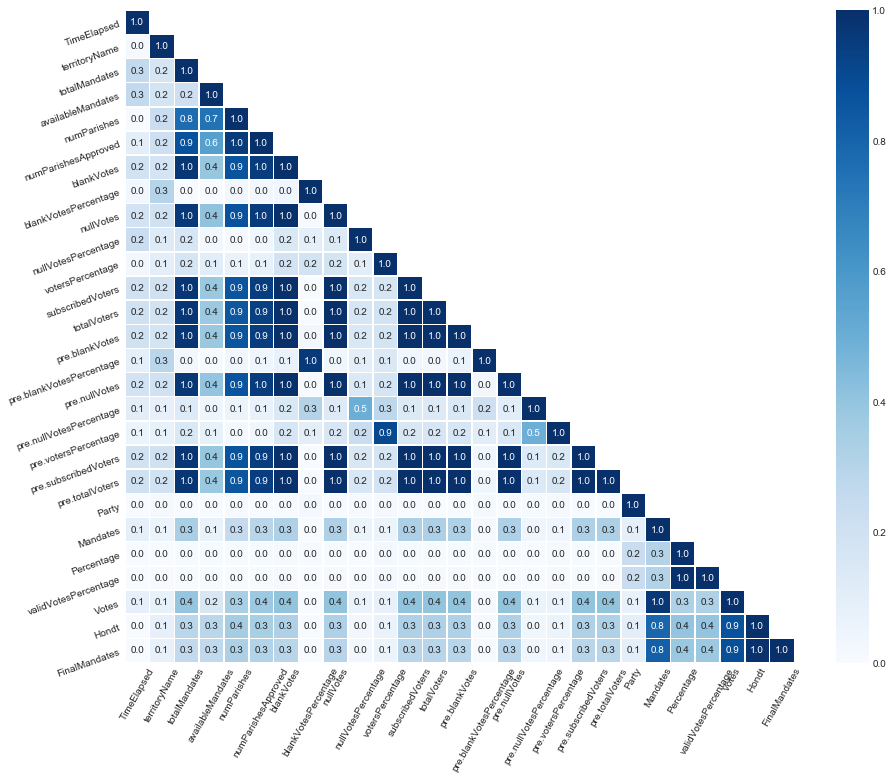

In [10]:
plt.figure(figsize=(15,12)) 

corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = 0)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

sns.heatmap(lower_triangle, annot=True, linewidths=.5, fmt= '.1f',cmap = 'Blues',mask = mask,xticklabels = corr.index, yticklabels = corr.columns)

plt.xticks(rotation = 60)
plt.yticks(rotation = 20) 
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 27 columns):
TimeElapsed                 21643 non-null int64
territoryName               21643 non-null int32
totalMandates               21643 non-null int64
availableMandates           21643 non-null int64
numParishes                 21643 non-null int64
numParishesApproved         21643 non-null int64
blankVotes                  21643 non-null int64
blankVotesPercentage        21643 non-null float64
nullVotes                   21643 non-null int64
nullVotesPercentage         21643 non-null float64
votersPercentage            21643 non-null float64
subscribedVoters            21643 non-null int64
totalVoters                 21643 non-null int64
pre.blankVotes              21643 non-null int64
pre.blankVotesPercentage    21643 non-null float64
pre.nullVotes               21643 non-null int64
pre.nullVotesPercentage     21643 non-null float64
pre.votersPercentage        21643 non-null float

Applying PCA

In [12]:
X = df.drop('FinalMandates', axis=1)
# the dependent variable
Y = df['FinalMandates']

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26)
pca.fit(X)

PCA(n_components=26)

In [14]:
print(pca.explained_variance_ratio_)

[9.98703116e-01 1.17291359e-03 1.11831365e-04 9.79460920e-06
 2.02069575e-06 2.71274004e-07 3.03080811e-08 1.29427852e-08
 5.69757595e-09 2.77594900e-09 8.21194185e-10 1.69834054e-10
 3.21977829e-11 2.59235683e-11 5.69400517e-12 3.63750462e-12
 1.65806556e-12 1.24779694e-12 8.28796322e-13 1.37881668e-13
 9.46176216e-14 4.71854266e-14 6.22011347e-15 3.45074824e-15
 8.46433169e-16 8.07977001e-16]


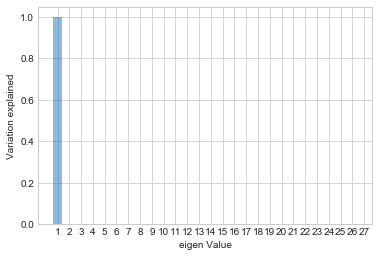

In [15]:
plt.bar(list(range(1,27)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.xticks(np.arange(1,28,1))
plt.show()

-from the pca just one variable is enough to capture 99.9% of the variance

-and as we can also see from the correlation plot the hondt column is 100 correlated to the target variable

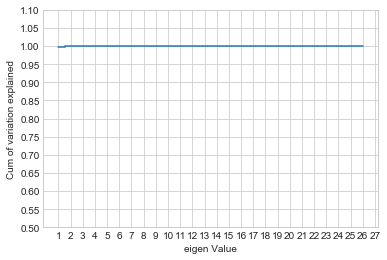

In [16]:
plt.step(list(range(1,27)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.yticks(np.arange(0.5,1.1,0.05))
plt.xticks(np.arange(1,28,1))
plt.show()


Dimensionality reduction(two components)

In [17]:
#fitting and transforming a pca with 1 pricipal component
pca2 = PCA(n_components=2)
pca2.fit(X)

print(pca2.explained_variance_ratio_)
Xpca2 = pca2.transform(X)

[0.99870312 0.00117291]


In [19]:
Xpca2 = pd.DataFrame(Xpca2)
Xpca2.head()

,0,1
0,228361.111835,128524.774063
1,228066.817258,109158.145839
2,226512.202248,6853.674978
3,226400.008994,-529.420767
4,226382.292670,-1695.277945


Support vector Regressor 

In [20]:
from sklearn import svm
 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


clr = svm.SVR()
kfold = KFold(n_splits = 10)
results = cross_val_score(clr, Xpca2, Y, cv=kfold)
        
print("model_score = {}%".format(results.mean()*100.0))

model_score = 31.660014631186222%


Linear regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

regression_model = LinearRegression()
kfold = KFold(n_splits = 10)
results = cross_val_score(clr, Xpca2, Y, cv=kfold)
        
print("model_score = {}%".format(results.mean()*100.0))

model_score = 31.660014631186222%
